Lagrange Polynomial
========

# Theory
**Lagrange Polynomial (LP)** is interpolating polynomial, it is wellknown for its intuitive and simple construction. It is considered the simplest representation, among all the possible representations; of the original function in question

## Definition
The **LP** is constructed through weighted sum of bases functions. The bases are constructed based on the following rule, *each basis has to have value of 1 at exactly one collocation point, and 0 at all others*. Lagrange proposed a construction of basis function that satisfy this rule. Lets say we have four collocation points $N=4$, then the Lagrange basis for point $(x_0, y_0)$ is
$$
\begin{equation*}
l_0 = \frac{(x - x_1)(x - x_2)(x - x_3)}{(x_0 - x_1)(x_0 - x_2)(x_0 - x_3)}
\end{equation*}$$

We can see that the basis $l_0$ is 1 at $x =x_0$ and 0 at the rest. Hence a general formulation of the bases functions is the following
$$
\begin{equation}
l_i(x) = \prod_{\substack{j = 1\\ j\ne i}}^n\frac{(x - x_j)}{(x_i - x_j)}   \qquad i = 0,1,2, \cdots,N
\end{equation}$$

And then the **Lagrange Polynomial (LP)** can be constructed as following
$$
\begin{equation}
L(x) = \sum_{i = 1}^n y_i l_i(x)
\end{equation}$$

**Lagrange Polynomial (LP)** is of order $(N-1)$, since it passes through $N$ collocation points. **LP** can be see a the polynomial of the lowest degree degree that would interpolates a set of points.


## Examples
Given a set of collocation points where $N=3$. Derive the lagrange polynomial interpolation through these set of points.
|0      | 1      | 2     |
|-      |-       |-      |
|$(1,\; 1)$|$(2,\; 2)$ |$(3,\; 3)$|

First we construct the bases functions
$$
\begin{align*}
l_0 &= \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} = \frac{(x - 2)(x - 3)}{(1 - 2)(1 - 3)} \\[10pt]
l_1 &= \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)} = \frac{(x - 1)(x - 3)}{(2 - 1)(2 - 3)} \\[10pt]
l_2 &= \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)} = \frac{(x - 1)(x - 2)}{(3 - 1)(3 - 2)} \\[10pt]
\end{align*}$$
Then the lagrange polynomial reads
$$
\begin{align*}
L(x) = \sum_{i = 1}^n y_i l_i(x) = 1 \cdot \frac{(x - 2)(x - 3)}{(1 - 2)(1 - 3)} + 2 \cdot \frac{(x - 1)(x - 3)}{(2 - 1)(2 - 3)} + 3 \cdot \frac{(x - 1)(x - 2)}{(3 - 1)(3 - 2)}
\end{align*}$$

<img src="./Resources/Lagrange Polynomial.png" width="1000">


# Implementation
Our representation of the set of collocation points will be through the use of `numpy` vector that holds in each row a `x` and `y` values "aka the input values and its evaluation by the unknown function"

$$
\begin{bmatrix}
    x_1     &  y_1      \\
                        \\
    \vdots  &  \vdots   \\
                        \\
    x_N     &  y_N      \\      
\end{bmatrix}
$$

$
\text{where} \\
\begin{array}{l l}
    \qquad x, \; y &: \text{Input value and its evaluation by the unknown function, respectively}\\
    \qquad N &: \text{Number of collocation points}
\end{array}
$

Moreover the points will be sampled from an analytical function that we define. We do this so we can better compare the lagrange polynomial approximation with the original function.

## Imports

In [219]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [220]:
N = 4                      # number of collocation points
a, b = [-5,5]              # interpolation interval
f = lambda x : np.sin(x)   # function to sample points from

## Algorithm

```mermaid
    flowchart LR
        get_args(Get collocation points) --> l_i(Construct each basis function l_i)
        l_i -->|"iterative multiplication of (x - x_j)/(x_i - x_j)"| l_i
        l_i --> l(Store basis l_i) 
        l_i --> f(Construct the lagrange polynomial f through weighted bases)
        f -->|"iterative addition  of y_i*l_i"| f
```

In [221]:
def LP(points: list[float, float]) -> tuple[Callable, list[Callable]]:
    '''
    Construct the lagrange polynomial approximation through given set of collocation points

    Args:
        points: Collocation points

    Returns:
        The lagrange polynomial approximation and its bases
    '''

    bases = []
    L = 0
    for x_i, y_i in points:
        l_i = 1
        for x_j, _ in points:
            if x_i == x_j:
                continue
            
            l_i *= (x - x_j)/(x_i - x_j)

        bases.append(sp.lambdify(x, l_i))
        L += y_i*l_i
    
    return sp.lambdify(x, L), bases

## Results Visualization
This section aims to illustrate accuracy of lagrange polynomial approximation of the original function in question. The visualizations used
- Function Plot: The closeness of lagrange polynomial to the original function
- Function Bases Plot: Show the bases that constructed the lagrange polynomial

In [222]:
# sample the collocation points
xx = np.linspace(a, b, num=N)
points = np.stack((xx, f(xx)), axis=-1)

# lagrange polynomial & bases 
L, bases = LP(points)

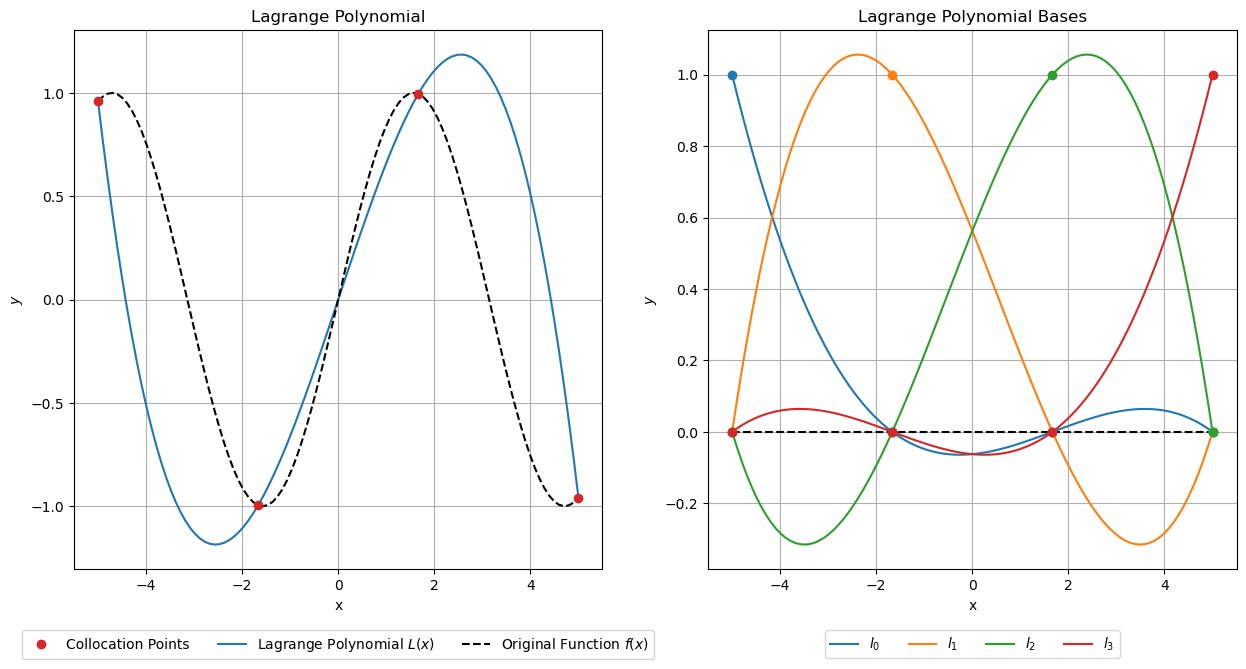

In [223]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

# fine domain and collocation points
domain = np.linspace(a, b, num=100) 
x_values, y_values = points[:,0], points[:,1]

# lagrange polynomial plot
ax[0].plot(x_values, y_values, "o", color="tab:red", label= "Collocation Points", zorder=4)
ax[0].plot(domain, L(domain), color="tab:blue", label="Lagrange Polynomial $L(x)$")
ax[0].plot(domain, f(domain), "k--", label="Original Function $f(x)$")
ax[0].set(xlabel="x", ylabel=r"$y$", title="Lagrange Polynomial")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
ax[0].grid(True)

# bases functions plot
for i, basis in enumerate(bases):
    color = next(ax[1]._get_lines.prop_cycler)['color']
    ax[1].plot(domain, basis(domain), color=color, label=f"$l_{i}$")
    ax[1].plot(x_values, basis(x_values), "o", color=color, zorder=4)
ax[1].plot(domain, np.zeros_like(domain), "k--")
ax[1].set(xlabel="x", ylabel=r"$y$", title="Lagrange Polynomial Bases")
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
ax[1].grid(True)


## Ringing Phenomenon
Ringing phenomenon "or Runges phenomenon" is the problem of oscillation of the interpolation polynomial especially at the edges of the interpolation interval. This problem occur as the number of equidistant collocation points $N$ that the interpolation polynomial has to pass through get large. In fact, the error for a polynomial $L_N(x)$ of degree $N$ has an error that scales as $O(h^{n+1})$ for equidistant collocation points. This is a major problem that lagrange interpolation technique suffer from, actually it is problem in general for any polynomial interpolation. In this section we will illustrate two examples of it *"see how as we increase collocation points $N$ the oscillation around the edges increase"*
- Example 1
    - Let the following function to be defined in $[-1, 1]$ 
    $$
    \begin{equation*}
    f(x) = \frac{1}{1+25x^2}
    \end{equation*}$$
    - Case 1: construct and plot lagrange polynomial when $N =6$ 
    - Case 2: construct and plot lagrange polynomial when $N =10$ 
- Example 2
    - Let the following function to be defined in $[-2, 2]$
    $$
    \begin{equation*}
    f(x) = \frac{3 e^x}{x^2 + x + 1}
    \end{equation*}$$
    - Case 1: construct and plot lagrange polynomial when $N =9$ 
    - Case 2: construct and plot lagrange polynomial when $N =20$ 

It is presented in the oscillation that A well known problem that polynomial interpolation technique such as Lagrange of oscillation at the edges of an interval that occurs when using polynomial interpolation with polynomials of high degree over a set of equispaced interpolation points
set up 

- Collocation Points $N = 54$
- Function $f(x) = \sin x$ in $[-5, 5]$

In [224]:
## Example 1
# domain
x6 = np.linspace(-1, 1, num=6)
x10 = np.linspace(-1, 1, num=10)

# function 
f1 = lambda x: 1/(1 + 25*x**2)

# lagrange polynomials & bases
L6, _ = LP(points=np.stack((x6, f1(x6)), axis=-1))
L10, _ = LP(points=np.stack((x10, f1(x10)), axis=-1))

In [225]:
## Example 2
# domain
x9 = np.linspace(-2, 2, num=9)
x20 = np.linspace(-2, 2, num=20)

# function 
f2 = lambda x: 3*np.exp(x) / (x**2 + x + 1)

# lagrange polynomials & bases
L9, _ = LP(points=np.stack((x9, f2(x9)), axis=-1))
L20, _ = LP(points=np.stack((x20, f2(x20)), axis=-1))

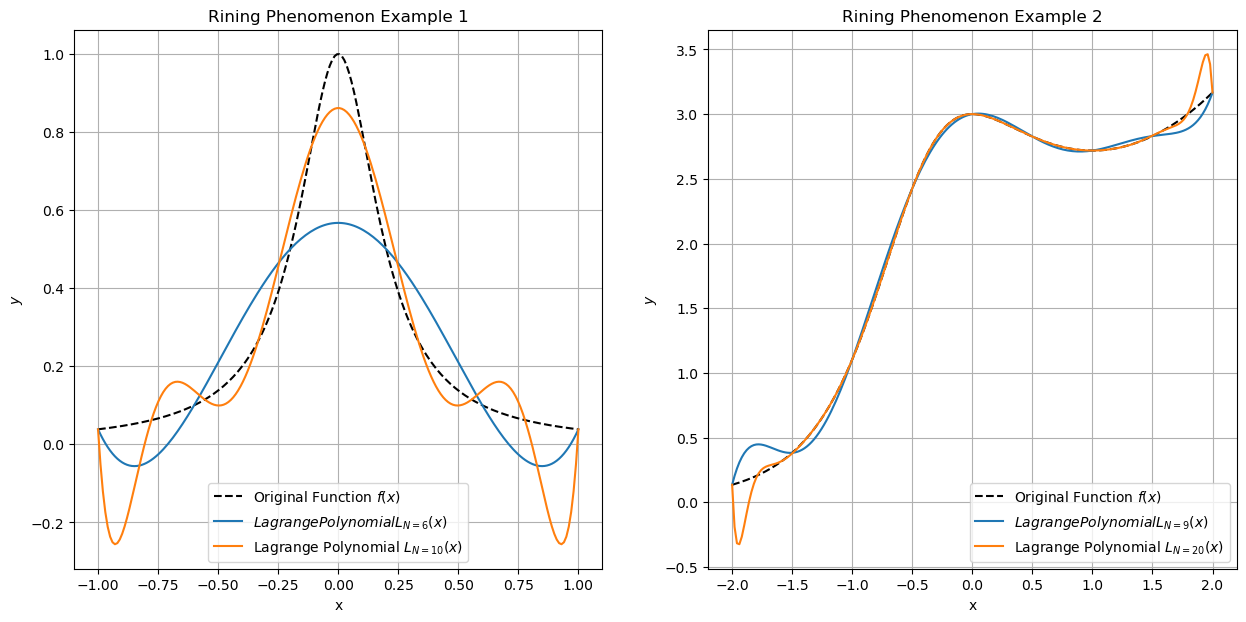

In [226]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

# example 1
domain = np.linspace(-1, 1, num=200) 
ax1.plot(domain, f1(domain), "k--", label="Original Function $f(x)$")
ax1.plot(domain, L6(domain), label="$Lagrange PolynomialL_{N=6}(x)$ ")
ax1.plot(domain, L10(domain), label="Lagrange Polynomial $L_{N=10}(x)$")
ax1.set(xlabel="x", ylabel=r"$y$", title="Rining Phenomenon Example 1")
ax1.grid(True)
ax1.legend()

# example 2
domain = np.linspace(-2, 2, num=200) 
ax2.plot(domain, f2(domain), "k--", label="Original Function $f(x)$")
ax2.plot(domain, L9(domain), "", label="$Lagrange PolynomialL_{N=9}(x)$ ")
ax2.plot(domain, L20(domain), "", label="Lagrange Polynomial $L_{N=20}(x)$")
ax2.set(xlabel="x", ylabel=r"$y$", title="Rining Phenomenon Example 2")
ax2.grid(True)
ax2.legend()

plt.show()